# Описание данных
В данной задаче будут использоваться данные с сайта kaggle.com Spotify Songs 2023 (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023). Этот набор данных содержит полный список самых известных песен 2023 года, представленных на Spotify.
Список всех столбцов (признаков):
- track_name: Название песни
- artist(s)name: Имя исполнителя(ей) песни
- artist_count: Количество исполнителей, участвующих в песне
- released_year: Год выпуска песни
- released_month: Месяц выпуска песни
- released_day: День месяца выпуска песни
- in_spotify_playlists: Количество плейлистов Spotify, в которые включена песня
- in_spotify_charts: Присутствие и ранг песни в чартах Spotify
- streams: Общее количество прослушиваний на Spotify
- in_apple_playlists: Количество плейлистов Apple Music, в которые включена песня
- in_apple_charts: Присутствие и ранг песни в чартах Apple Music
- in_deezer_playlists: Количество плейлистов Deezer, в которые включена песня
- in_deezer_charts: Присутствие и ранг песни в чартах Deezer
- in_shazam_charts: Присутствие и ранг песни в чартах Shazam
- bpm: Ударов в минуту, мера темпа песни
- key: Тональность песни
- mode: Режим песни (мажорный или минорный)
- danceability%: Процент, указывающий, насколько подходит песня для танцев
- valence_%: Положительность музыкального содержания песни
- energy_%: Воспринимаемый уровень энергии песни
- acousticness_%: Количество акустического звука в песне
- instrumentalness_%: Количество инструментального содержания в песне
- liveness_%: Присутствие элементов живого исполнения
- speechiness_%: Количество произнесенных слов в песне


In [1]:
from sklearn.manifold import TSNE
from sklearn import preprocessing

import plotly.graph_objs as go

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import seaborn as sns

import time

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Просмотр и предобработка данных

In [3]:
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

In [4]:
df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Сразу можно заметить, что количественные показатели имеют тип object. Проверим количество пропущенных и неверных значений и удалим данные строки.

In [6]:
print(df.isna().mean())

track_name              0.000000
artist(s)_name          0.000000
artist_count            0.000000
released_year           0.000000
released_month          0.000000
released_day            0.000000
in_spotify_playlists    0.000000
in_spotify_charts       0.000000
streams                 0.000000
in_apple_playlists      0.000000
in_apple_charts         0.000000
in_deezer_playlists     0.000000
in_deezer_charts        0.000000
in_shazam_charts        0.052466
bpm                     0.000000
key                     0.099685
mode                    0.000000
danceability_%          0.000000
valence_%               0.000000
energy_%                0.000000
acousticness_%          0.000000
instrumentalness_%      0.000000
liveness_%              0.000000
speechiness_%           0.000000
dtype: float64


In [7]:
df = df.drop(574)
df.streams = pd.to_numeric(df.streams)
df.fillna(value=0, axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.isna().mean())

track_name              0.0
artist(s)_name          0.0
artist_count            0.0
released_year           0.0
released_month          0.0
released_day            0.0
in_spotify_playlists    0.0
in_spotify_charts       0.0
streams                 0.0
in_apple_playlists      0.0
in_apple_charts         0.0
in_deezer_playlists     0.0
in_deezer_charts        0.0
in_shazam_charts        0.0
bpm                     0.0
key                     0.0
mode                    0.0
danceability_%          0.0
valence_%               0.0
energy_%                0.0
acousticness_%          0.0
instrumentalness_%      0.0
liveness_%              0.0
speechiness_%           0.0
dtype: float64


Также добавим новый столбец, который будет содержать в себе название месяца вместо его номера, данный столбец нам понадобиться в дальнейшем.

In [8]:
import calendar
 
df['released_month_name'] = df['released_month'].apply(lambda x: calendar.month_name[x])
df['released_month_name']

0          July
1         March
2          June
3        August
4           May
         ...   
947    November
948     October
949    November
950     October
951    November
Name: released_month_name, Length: 952, dtype: object

# Построение столбчатой и круговой диаграммы

In [9]:
fig = go.Figure()
fig.add_trace(go.Bar(x = df.released_month_name.unique(), y=df['released_month'].value_counts(),
                     marker=dict(color=list(range(12)), colorscale='RdBu',
                                line=dict(color='black', width=2))))
fig.update_layout(
            title={
                'text': 'Диаграмма количества выпускаемых треков от месяца',
                'x': 0.5,
                'y': 0.95,
                'font_size': 20
            },
            font=dict(size=14),
            autosize=False,
            width=1000,
            height=700,
            margin=dict(l=0, r=0, t=0, b=0)
)

fig.update_xaxes(
    title_text='Месяц',
    tickangle=315,
    tickfont=dict(size=16)
)

fig.update_yaxes(
    title_text='Количество треков',
    title_standoff=0,
    tickfont=dict(size=16)
)

fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='ivory')
fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='ivory')

fig.show()

In [10]:
max_index = df['released_month'].value_counts().idxmax()
pull_values = [0] * 12
pull_values[max_index - 1] = 0.2  # Выдвигаем самый крупный сектор

fig = go.Figure()

fig.add_trace(go.Pie(
    labels=df.released_month_name.unique(),
    values=df['released_month'].value_counts(),
    textinfo='percent+label',  # Отображение процентов и меток
    marker=dict(
        colors=list(range(12)),
        line=dict(color='black', width=2),
    ),
    pull=pull_values,
))

fig.update_layout(
    title_text='Диаграмма количества выпускаемых треков от месяца',
    title_x=0.5,
    title_font_size=20,
    font_size=16,
    legend=dict(
        x=1,
        y=0.5,
        font=dict(size=16),
    ),
    width=1000,
    height=1000,
)

fig.show()

# Построение линейных графиков

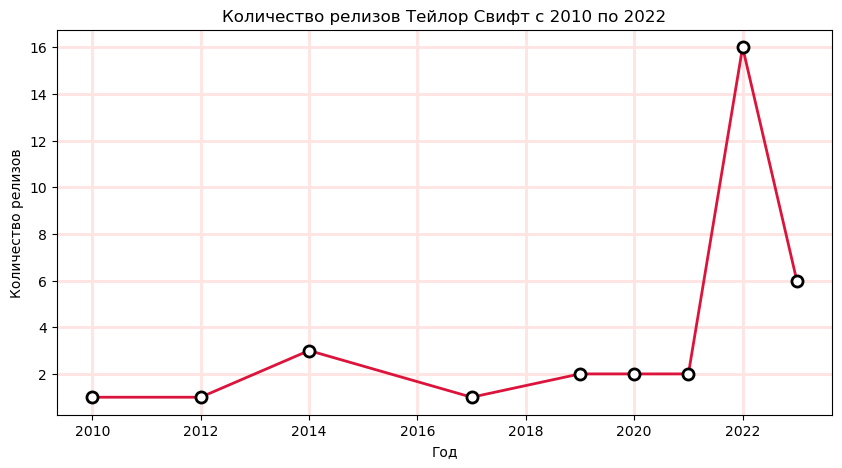

In [47]:
TS_released = df[df['artist(s)_name'] == 'Taylor Swift']['released_year'].value_counts()
TS_released.sort_index(inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(TS_released.index, TS_released, color='crimson',
         marker='o', markersize=8, markerfacecolor='white',
         markeredgewidth=2, markeredgecolor='black', linewidth=2)

plt.grid(color='mistyrose', linewidth=2)

plt.xlabel('Год')
plt.ylabel('Количество релизов')
plt.title('Количество релизов Тейлор Свифт с 2010 по 2022')

plt.show()

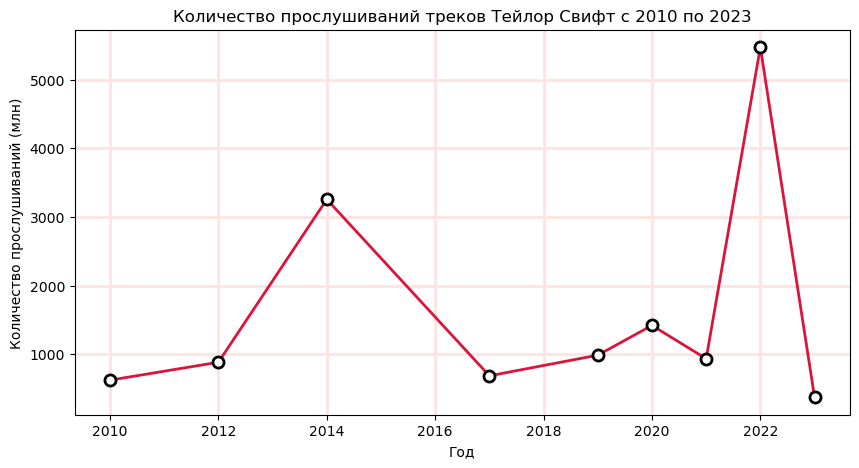

In [48]:
TS_streams = df[df['artist(s)_name'].str.contains('Taylor Swift')]
TS_streams['streams'] = TS_streams['streams'].astype(int) / 1000000
TS_streams_by_year = TS_streams.groupby('released_year')['streams'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(TS_streams_by_year['released_year'], TS_streams_by_year['streams'], color='crimson',
         marker='o', markersize=8, markerfacecolor='white',
         markeredgewidth=2, markeredgecolor='black', linewidth=2)

plt.grid(color='mistyrose', linewidth=2)

plt.xlabel('Год')
plt.ylabel('Количество прослушиваний (млн)')
plt.title('Количество прослушиваний треков Тейлор Свифт с 2010 по 2023')

plt.show()

# Визуализация многомерных данных используя t-SNE и UMAP
Будем использовать учебный датасет мнист

In [49]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

In [50]:
mnist = fetch_openml(name="mnist_784")

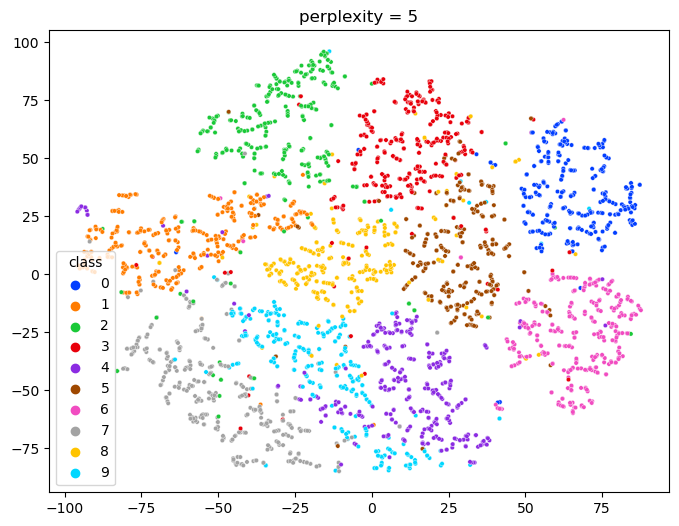

In [62]:
data = mnist.data[:3000]
labels = mnist.target[:3000]

scaler = preprocessing.MinMaxScaler()
D = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
start_time = time.time()
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_time = time.time() - start_time
#print(tsne_time)
embedded_date = tsne.fit_transform(D)
    
plt.figure(figsize=(8, 6))
sns.scatterplot(data=embedded_date, x=embedded_date[:,0], y=embedded_date[:,1], hue=labels, palette='bright', s=10)
plt.title('perplexity = 5')
plt.show()

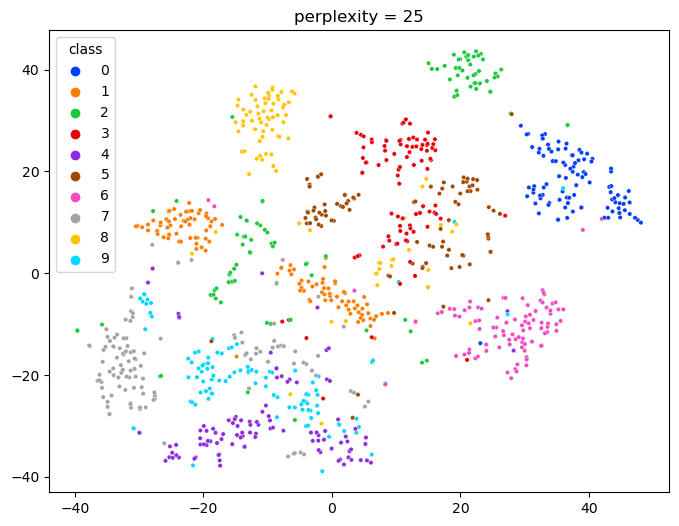

In [52]:
tsne = TSNE(n_components=2, perplexity=25, random_state=42)
embedded_date = tsne.fit_transform(D)
    
plt.figure(figsize=(8, 6))
sns.scatterplot(data=embedded_date, x=embedded_date[:,0], y=embedded_date[:,1], hue=labels, palette='bright', s=10)
plt.title('perplexity = 25')
plt.show()

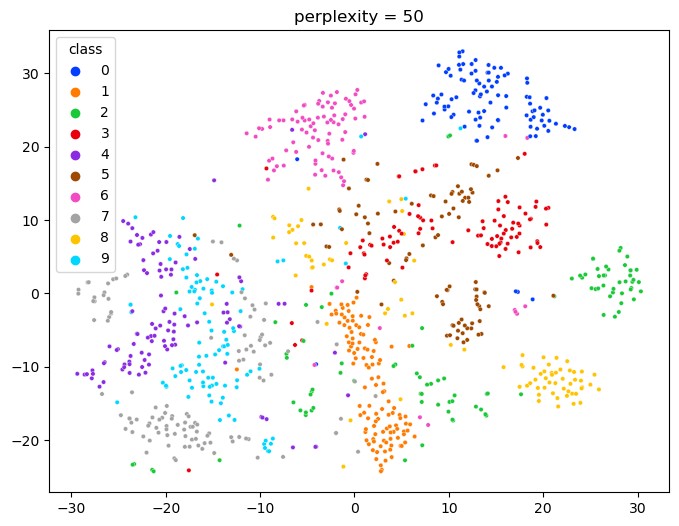

In [53]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
embedded_date = tsne.fit_transform(D)
    
plt.figure(figsize=(8, 6))
sns.scatterplot(data=embedded_date, x=embedded_date[:,0], y=embedded_date[:,1], hue=labels, palette='bright', s=10)
plt.title('perplexity = 50')
plt.show()

In [65]:
import umap.umap_ as umap
n_n = (5, 25, 50)
m_d = (0.1, 0.6)

In [66]:
um = dict()
for i in range(len(n_n)):
    for j in range(len(m_d)):
        start_time = time.time()
        um[(n_n[i], m_d[j])] = (umap.UMAP(n_neighbors=n_n[i], min_dist=m_d[j], random_state=42).fit_transform(embedded_date))
        umap_time = time.time() - start_time
        #print(umap_time)

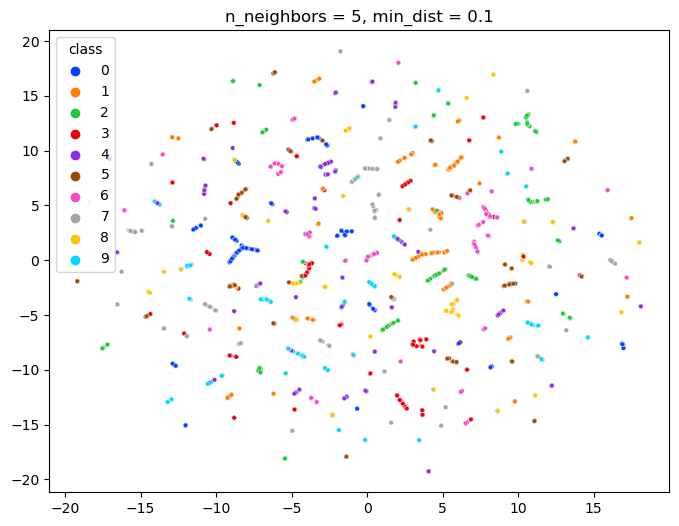

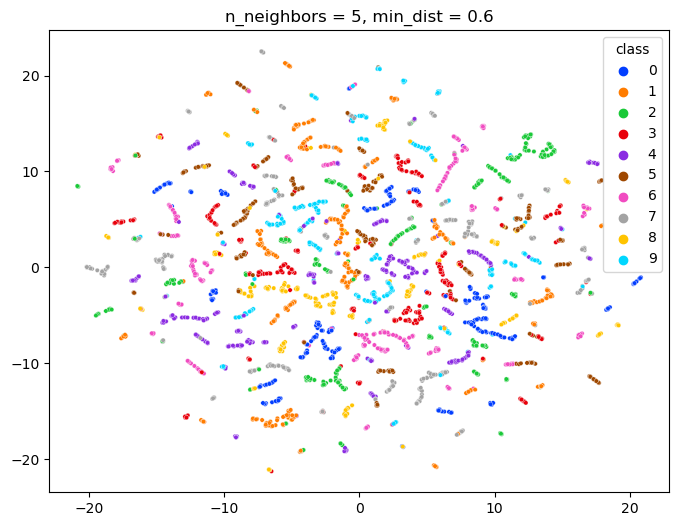

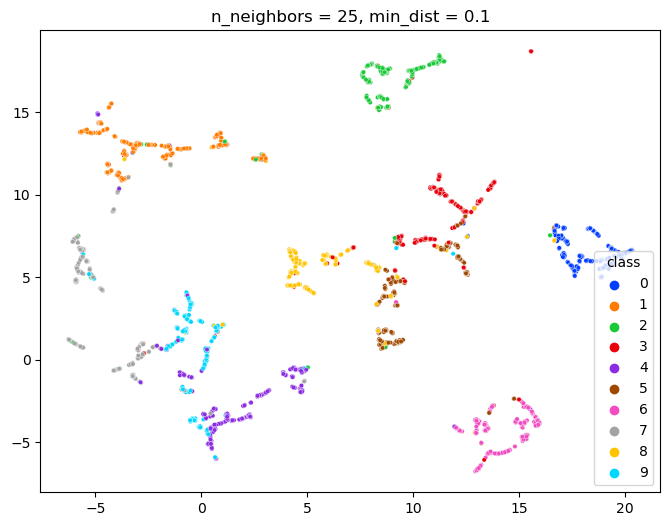

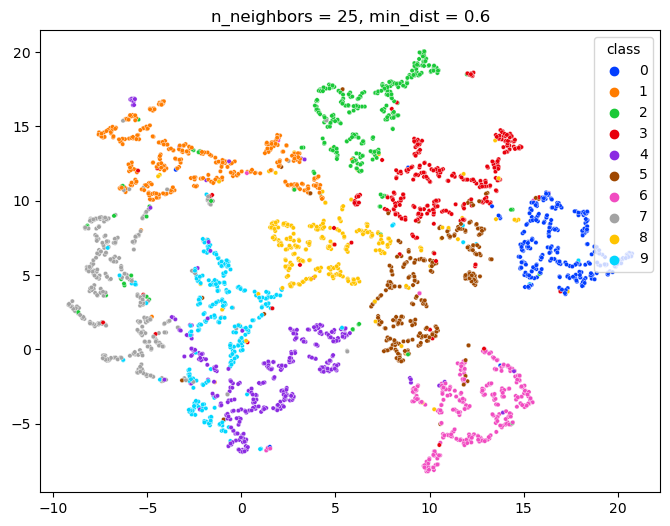

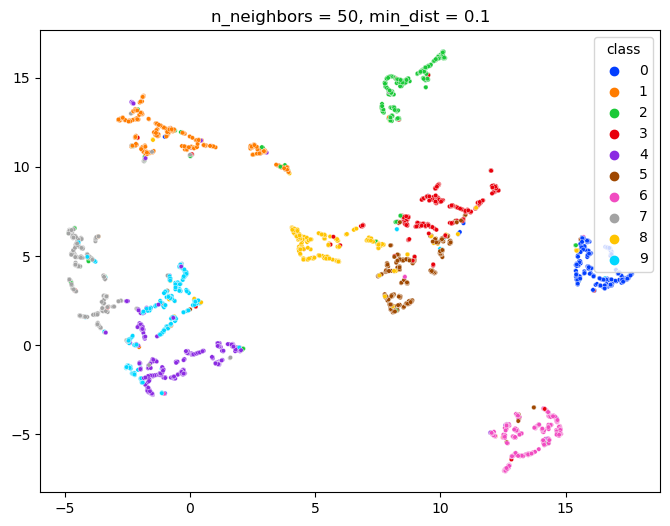

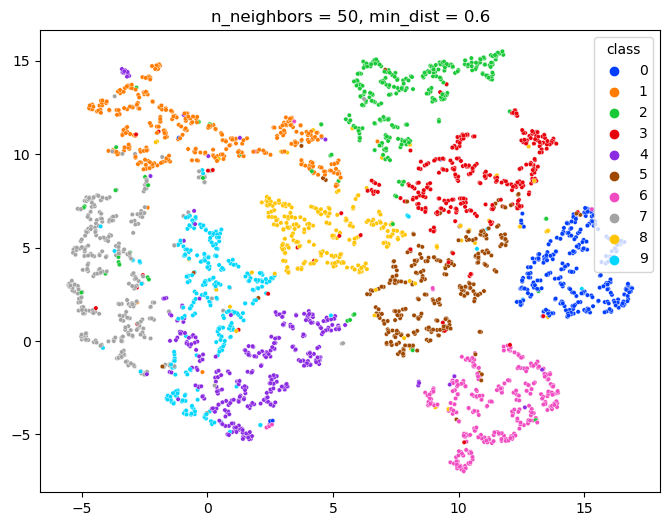

In [67]:
%matplotlib inline
for i in um.keys():
    plt.figure(figsize=(8, 6))
    data = um[i]
    sns.scatterplot(data=data, x=data[:,0], y=data[:,1], hue=labels, palette='bright', s=10)
    plt.title(f'n_neighbors = {i[0]}, min_dist = {i[1]}')
    plt.show()

In [64]:
print(tsne_time)

0.0
